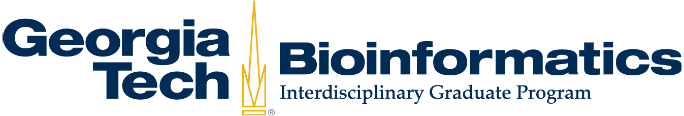

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>Shivam Sharma (shivamsharma13@gatech.edu), Nilavrah Sensarma (nsensarma3@gatech.edu), Bengy Gyimah-Asamoah, (bgyimaha3@gatech.edu)

</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 9 PCA starter notebook</h2>
    <h3>Deadline: 11:59PM, November 26th, 2024</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Genetic similarity**
### *Total Questions: 2*
### *Total Points: 20+20=40*


---

import os
import subprocess
import shutil<div class="alert alert-block alert-warning">
    <h3>1.1 Calculating genetic relationship in the 1000 Genomes data</h3>
    <p>GRM matricies can be used to determine the similarity between a set of DNA samples.</p>
    <p>In the 1000 genomes data, perform appropriate QC and calculate GRM. Head the first few lines of your GRM as well as the plink2 log file</p>
</div>

In [ ]:
import os
import subprocess
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#os.listdir('/storage/ice1/7/3/ssteele37/project9_sandbox/scratch')
#!rm -r /storage/ice1/7/3/ssteele37/project9_sandbox/scratch
#os.mkdir('/storage/ice1/7/3/ssteele37/project9_sandbox/scratch')
#!awk '{print $2}' /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/chr12_plink.bim | sort | uniq -d


In [18]:
#os.mkdir('/storage/ice1/7/3/ssteele37/project9_sandbox/scratch')
source_file_dir = '/storage/ice-shared/biol6150/Data/1000Genomes/'
scratch_dir = '/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/'
vcf_file_names = []
filtered_names = []
for file in os.listdir(source_file_dir):
    if file.endswith('.vcf.gz'):
        vcf_file_name = source_file_dir + file
        vcf_file_names.append(vcf_file_name)
        filtered_names.append(scratch_dir + str(vcf_file_name.split('/')[-1].split('.')[1]) + '_plink')
        

In [ ]:
#do filtering with plink instead
### Convert to plink2 formats and do all subsets in a chain of commands
for i in range(len(vcf_file_names)):
    vcf_name = vcf_file_names[i]
    plink_name = filtered_names[i]
    #make the bedfile
    cmd1 = [
    "plink2",
    "--vcf", vcf_name,
    "--make-bed",
    "--out", plink_name
    ]
    #run qc
    cmd2 = [
    "plink2",
    "--bfile", plink_name,
    "--set-all-var-ids",  "@:#\$1,\$2",
    "--rm-dup", "exclude-all",
    "--geno", "0.05", "--maf", "0.05",# "--indep-pairwise", "50", "10", "0.05",
    "--new-id-max-allele-len", "20", "missing",
    "--make-bed", "--out", str(plink_name) + ".QC"
    ]
    #clean up directory some
    cmd3 = [
    "rm", plink_name + '.fam', plink_name + '.bim', plink_name + '.bed'
    ]
    subprocess.run(cmd1, check=True)
    subprocess.run(cmd2, check=True)
    subprocess.run(cmd3, check=True)
    


In [ ]:
#merge the plink files

#build a merge_list file to instruct merge
!rm /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/merge_list.txt
with open('/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/merge_list.txt', 'w') as ml:
    for file in os.listdir('/storage/ice1/7/3/ssteele37/project9_sandbox/scratch'):
        name = file.split('.')[0]
        if name[0] != 'm':
            if name != 'chr1_plink':
                if name != 'combined_plink-merge':
                    if name != 'exclude_variants':
                        if name != 'combined_plink':
                            name = '/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/' + name + '.QC1'
                            ml.write(name + '\n')

#filter out the "." variants 
for i in range(len(filtered_names)):
    output_file = "/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/exclude_variants.txt"
    plink_name = filtered_names[i] + '.QC'
    cmd1 = [
    "awk",
    "$2 == \".\" {print $2}", plink_name + '.bim'
    ]
    with open(output_file, "w") as outfile:
        subprocess.run(cmd1, stdout=outfile, check=True)
    cmd2 = [
    "plink2",
    "--bfile", plink_name,
    "--exclude",  "/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/exclude_variants.txt",
    "--make-bed", "--out", plink_name + '1'
    ]
    subprocess.run(cmd2, check=True)
    
#execute merge
!plink --bfile /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/chr1_plink.QC1 --merge-list /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/merge_list.txt --make-bed --out /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink


In [45]:
#build GRM
!plink2 --bfile /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink --make-grm-bin --out /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/grm_1000G

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/grm_1000G.log.
Options in effect:
  --bfile /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink
  --make-grm-bin
  --out /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/grm_1000G

Start time: Tue Nov 26 18:36:13 2024
772156 MiB RAM detected, ~758333 available; reserving 386078 MiB for main
workspace.
Using up to 16 threads (change this with --threads).
2504 samples (0 females, 0 males, 2504 ambiguous; 2504 founders) loaded from
/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink.fam.
7882422 variants loaded from
/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink.bim.
Note: No phenotype data present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505

In [53]:
!head /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/grm_1000G.log


PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)
Options in effect:
  --bfile /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink
  --make-grm-bin
  --out /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/grm_1000G

Hostname: atl1-1-01-005-2-1.pace.gatech.edu
Working directory: /home/hice1/ssteele37/project9_sandbox
Start time: Tue Nov 26 18:36:13 2024



In [7]:
grm_bin_file = '/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/grm_1000G.grm.bin'
grm_id_file = '/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/grm_1000G.grm.id'

# Load the grm files into a manipulatable matrix/df
ids = pd.read_csv(grm_id_file, delim_whitespace=True, header=None, names=['FID', 'IID'])
id_pairs = pd.MultiIndex.from_product([ids['IID'], ids['IID']], names=['IID1', 'IID2'])
N = len(ids)

with open(grm_bin_file, 'rb') as f:
    lower_triangle = np.fromfile(f, dtype=np.float32)

# Reconstruct the full matrix
grm_matrix = np.zeros((N, N), dtype=np.float32)
indices = np.tril_indices(N)  
grm_matrix[indices] = lower_triangle 
grm_matrix[(indices[1], indices[0])] = lower_triangle
grm_df = pd.DataFrame(grm_matrix, index=ids['IID'], columns=ids['IID'])
print(grm_df.head())

IID       HG00096   HG00097   HG00099   HG00100   HG00101   HG00102   HG00103  \
IID                                                                             
HG00096  0.980198  0.123028  0.128841  0.124878  0.120235  0.116324  0.117721   
HG00097  0.123028  0.992517  0.114202  0.120854  0.121156  0.117953  0.118987   
HG00099  0.128841  0.114202  0.980133  0.143229  0.125066  0.119846  0.119133   
HG00100  0.124878  0.120854  0.143229  0.996367  0.140815  0.127104  0.109954   
HG00101  0.120235  0.121156  0.125066  0.140815  0.975105  0.116173  0.113304   

IID       HG00105   HG00106   HG00107  ...   NA21128   NA21129   NA21130  \
IID                                    ...                                 
HG00096  0.110672  0.117556  0.116746  ...  0.027052  0.033071  0.033202   
HG00097  0.123356  0.116829  0.125348  ...  0.034662  0.029202  0.035459   
HG00099  0.115065  0.129237  0.118660  ...  0.036607  0.040532  0.037312   
HG00100  0.110067  0.116037  0.127889  ...  0.032695

<div class="alert alert-block alert-warning">
    <h3>1.2 Find pairs of closest individuals within each population</h3>
    <p>You have 26 populations in the 1000 genomes data. Find out top 3 pairs of closest individuals within each population.</p>
</div>

In [8]:
igsr = pd.read_csv('igsr_samples.tsv', sep='\t')
igsr = igsr[['Sample name', 'Population code']]

grm_df2 = grm_df.reset_index()
grm_df2 = pd.merge(grm_df2, igsr, how = 'left', left_on = 'IID', right_on = 'Sample name')

pops = list(set(grm_df2['Population code']))
top_pairs = []
for pop in pops:
    subset_iids = grm_df2.loc[grm_df2['Population code'] == pop, 'IID']
    if len(subset_iids) > 4:
        pop_sub_grm = grm_df2[grm_df2['IID'].isin(subset_iids)]
        pop_sub_grm = pop_sub_grm[list(subset_iids) + ['IID']]

        pop_sub_grm.reset_index(inplace = True, drop = True)
        pop_sub_grm2 = pop_sub_grm.drop(['IID'], axis = 1)
        pop_sub_grm3 = pop_sub_grm2.copy()
        np.fill_diagonal(pop_sub_grm3.values, 0)
        stacked = pop_sub_grm3.stack()
        largest = stacked.nlargest(5)
        largest = pd.DataFrame(largest).reset_index()

        a1 = pop_sub_grm.IID.loc[largest['level_0'].iloc[0]]
        a2 = largest['level_1'].iloc[0]
        b1 = pop_sub_grm.IID.loc[largest['level_0'].iloc[2]]
        b2 = largest['level_1'].iloc[2]
        c1 = pop_sub_grm.IID.loc[largest['level_0'].iloc[4]]
        c2 = largest['level_1'].iloc[4]
        
        top_pairs.append([[a1, a2], [b1, b2], [c1, c2]])
        print(f'Top 3 most related in Population {pop}:\n{a1} and {a2}\n{b1} and {b2}\n{c1} and {c2}\n')



Top 3 most related in Population KHV:
HG02060 and HG02061
HG01857 and HG02513
HG01841 and HG02023

Top 3 most related in Population LWK:
NA19331 and NA19334
NA19027 and NA19042
NA19025 and NA19384

Top 3 most related in Population CHS:
HG00475 and HG00542
HG00581 and HG00607
HG00584 and HG00595

Top 3 most related in Population PEL:
HG02271 and HG02272
HG02272 and HG02291
HG01961 and HG02272

Top 3 most related in Population GIH:
NA20882 and NA20900
NA20891 and NA20900
NA21109 and NA21135

Top 3 most related in Population ITU:
HG03866 and HG03873
HG04023 and HG04025
HG04023 and HG04026

Top 3 most related in Population STU:
HG03733 and HG03899
HG03750 and HG03754
HG03692 and HG03896

Top 3 most related in Population JPT:
NA18975 and NA18994
NA18994 and NA18995
NA18975 and NA19000

Top 3 most related in Population ACB:
HG02429 and HG02479
HG02052 and HG02339
HG01915 and HG02484

Top 3 most related in Population BEB:
HG04161 and HG04162
HG03941 and HG04186
HG03600 and HG03941

Top 3 most

# **2. PCA**
### *Total questions: 3*
### *Total Points:  20+20+20=60*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Perform a PCA on 1000 genomes data</h3>
    <p>Perform appropirate QC steps as following:</p>
    <li>Missingness (at most 25% missingness allowed)</li>
    <li>Minor Allele frequency to remove rare variants (<5% frequency)</li>
    <li>Appropriate LD pruning to extract 100,000 - 300,000 markers (variants)</li>
    <p>Finally perform PCA on the 1000 genomes data which is QCed</p>  
</div>

In [205]:
#### See above for missingness and MAF filtering
#LD Pruning
!plink2 --bfile /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink --indep-pairwise 50 5 0.2 --out final_1000G

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to final_1000G.log.
Options in effect:
  --bfile /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink
  --indep-pairwise 50 5 0.2
  --out final_1000G

Start time: Tue Nov 26 19:58:16 2024
772156 MiB RAM detected, ~758160 available; reserving 386078 MiB for main
workspace.
Using up to 16 threads (change this with --threads).
2504 samples (0 females, 0 males, 2504 ambiguous; 2504 founders) loaded from
/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink.fam.
7882422 variants loaded from
/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink.bim.
Note: No phenotype data present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596

In [234]:
#run final subsetting with 250k prune in variants
!head -150000 /home/hice1/ssteele37/project9_sandbox/final_1000G.prune.in > /home/hice1/ssteele37/project9_sandbox/final_1000G_pca_prune
!plink2 --bfile /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink --extract /home/hice1/ssteele37/project9_sandbox/final_1000G_pca_prune --make-bed --out /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/pca_ready_plink



PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/pca_ready_plink.log.
Options in effect:
  --bfile /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink
  --extract /home/hice1/ssteele37/project9_sandbox/final_1000G_pca_prune
  --make-bed
  --out /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/pca_ready_plink

Start time: Tue Nov 26 20:10:26 2024
772156 MiB RAM detected, ~757675 available; reserving 386078 MiB for main
workspace.
Using up to 16 threads (change this with --threads).
2504 samples (0 females, 0 males, 2504 ambiguous; 2504 founders) loaded from
/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink.fam.
7882422 variants loaded from
/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/combined_plink.bim.
Note: No phenotype data present.
--extract: 150000 variants remaining

In [235]:
#run pca
!plink2 --bfile /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/pca_ready_plink --pca 10 --out pca_1000G

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pca_1000G.log.
Options in effect:
  --bfile /storage/ice1/7/3/ssteele37/project9_sandbox/scratch/pca_ready_plink
  --out pca_1000G
  --pca 10

Start time: Tue Nov 26 20:10:32 2024
772156 MiB RAM detected, ~757685 available; reserving 386078 MiB for main
workspace.
Using up to 16 threads (change this with --threads).
2504 samples (0 females, 0 males, 2504 ambiguous; 2504 founders) loaded from
/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/pca_ready_plink.fam.
150000 variants loaded from
/storage/ice1/7/3/ssteele37/project9_sandbox/scratch/pca_ready_plink.bim.
Note: No phenotype data present.
Calculating allele frequencies... 4387done.
Constructing GRM: 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919

<div class="alert alert-block alert-warning">
    <h3>2.2 Plot PCA plot</h3>
    <p>Points should be colored by continental population category of samples</p>
</div>

In [ ]:
#load in PCA data into dataframe
pca = pd.read_csv('/home/hice1/ssteele37/project9_sandbox/pca_1000G.eigenvec', delim_whitespace=True, header=None)
pca.columns = pca.iloc[0]
pca = pca.iloc[1:]
pca = pd.merge(pca, igsr, how = 'left', left_on = 'IID', right_on = 'Sample name')

/scratch/987765/ipykernel_3573807/483421999.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = {pop: plt.cm.get_cmap('tab10', len(population_codes))(i) for i, pop in enumerate(population_codes)}


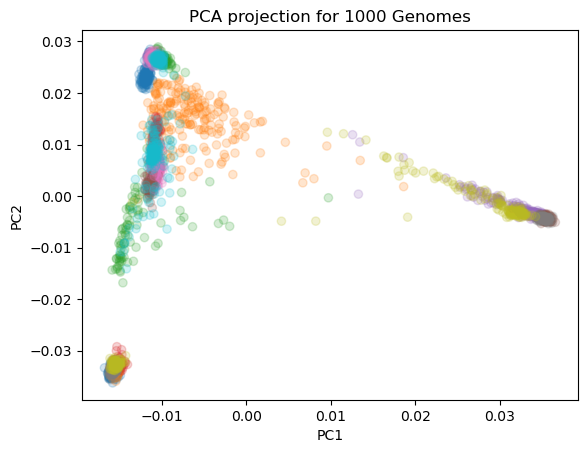

In [11]:
#plot
population_codes = pca['Population code'].unique()
color_map = {pop: plt.cm.get_cmap('tab10', len(population_codes))(i) for i, pop in enumerate(population_codes)}
colors = pca['Population code'].map(color_map)

pca['PC1'] = pca['PC1'].astype(float)
pca['PC2'] = pca['PC2'].astype(float)
plt.scatter(pca['PC1'], pca['PC2'], c = colors, alpha = 0.2)
plt.title('PCA projection for 1000 Genomes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<div class="alert alert-block alert-warning">
    <h3>2.3 Ptop_pairslot PCA plot with top genetically similar individuals</h3>
    <p>Highlight the individuals obtained in 1.2. Rest of the individuals on the PCA plot can be colored in grey</p>
</div>

In [285]:
top_pairs[0][0]

['NA19331', 'NA19334']

In [ ]:
#set color mappings for each pair
pca['color'] = [0] * len(pca)
num = 1
for i in range(len(top_pairs)):
    pop_pairs = top_pairs[i]
    for j in range(len(pop_pairs)):
        for k in range(len(pop_pairs[j])):
            pca['color'][pca['IID'] == pop_pairs[j][k]] = num
        num += 1

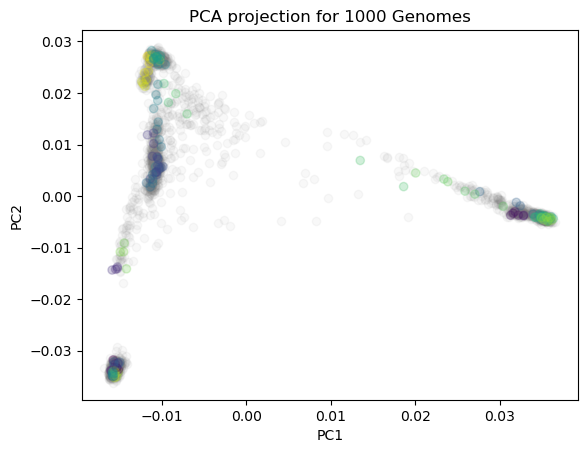

In [13]:
pca_grey = pca[pca['color'] == 0]
pca_colorful = pca[pca['color'] != 0]

plt.scatter(pca_grey['PC1'], pca_grey['PC2'], color = 'grey', alpha = 0.05)
plt.scatter(pca_colorful['PC1'], pca_colorful['PC2'], c = pca_colorful['color'], alpha = 0.25)

plt.title('PCA projection for 1000 Genomes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()